### Topics covered till now

- ML Basics
- Linear regression (Theory+ Coding)
- SVM Theory + Coding

### Today

- PCA
- Coding


## Why PCA?

- Used for dimension reduction
  - Goal is to deal with sparse and redundant components and preserve information bearing components.
  - l≪m
  - Optimum PCA is also known as **Karhunen-Loève (KL)** transformation


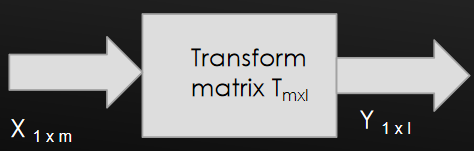


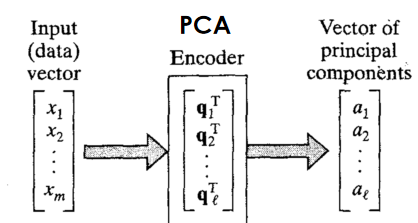


#### Eigen-DECOMPOSITION OF COVARIANCE MATRIX

- Center the data
- Calculate covariance matrix
- Calculate eigenvalues and eigen vectors of covariance matrix
- Calculate the principal components by projecting the input
- Project the data vector onto eigen vectors belonging to dominant eigenvalues.


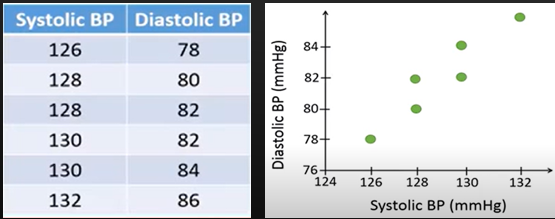

- Mean Systolic BP=129
- Mean Diastolic BP=82

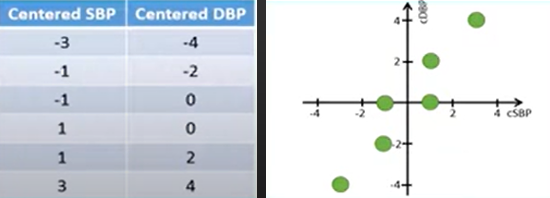


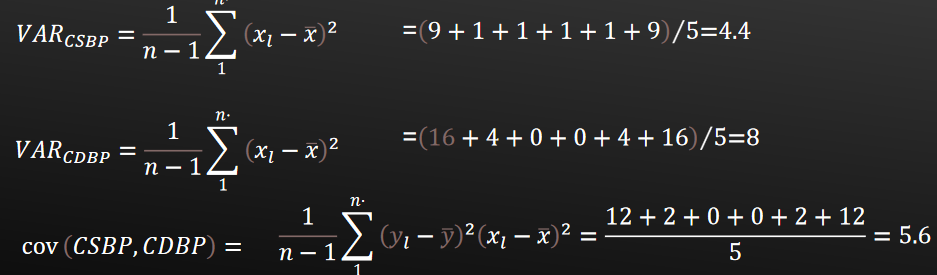


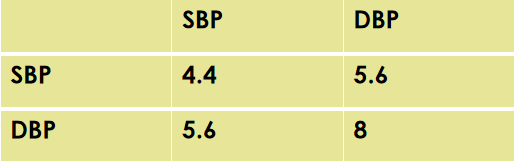


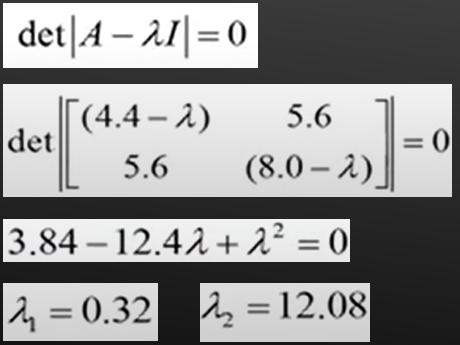


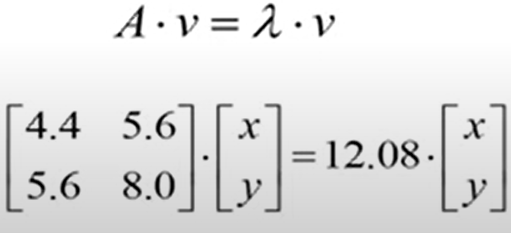
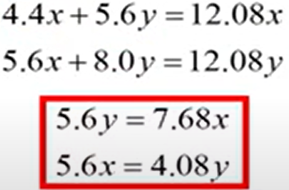

- Compute normalized eigen vectors

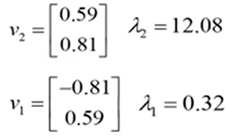


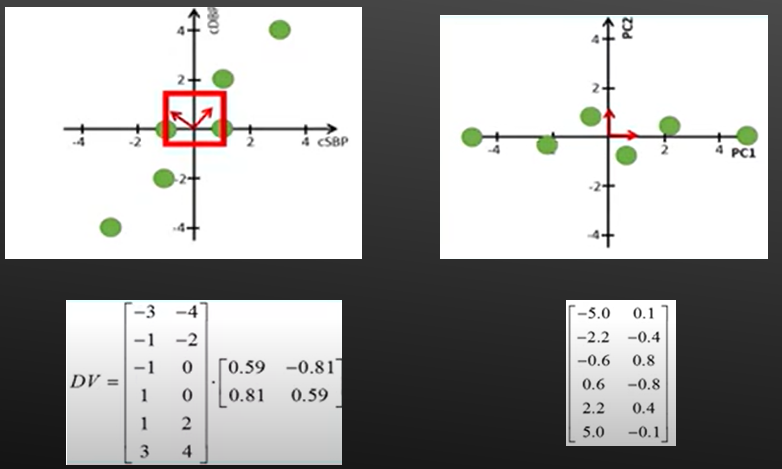


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn import datasets
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from skimage.util import random_noise
from skimage import img_as_float

In [3]:
iris = datasets.load_iris()
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# X=iris.data[:,:2]
cols = ["sepal length (cm)", "sepal width (cm)", "target"]
X_sel = pd.DataFrame(iris_df[cols].values, columns=cols)
Y = iris.target
yn = np.where(Y == 0, "setosa", np.where(Y == 1, "virginica", "versicolor"))

X_sel["target"] = yn
X_sel.head()
# X=X_sel.iloc[:].values

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\desktop\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot

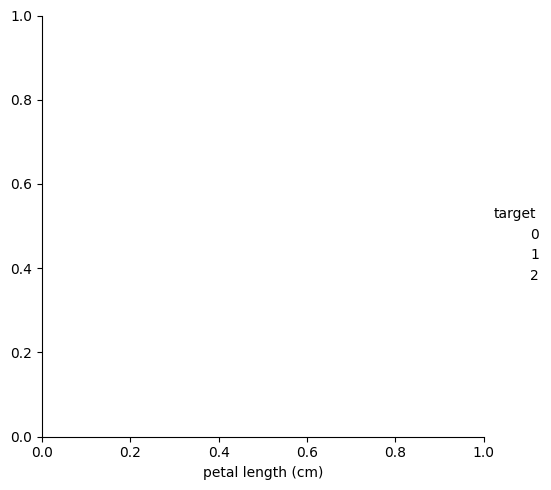

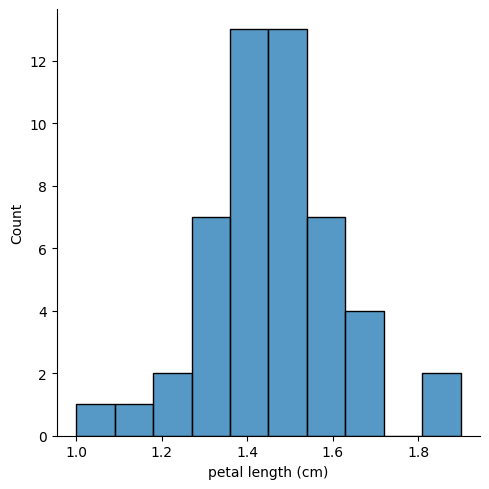

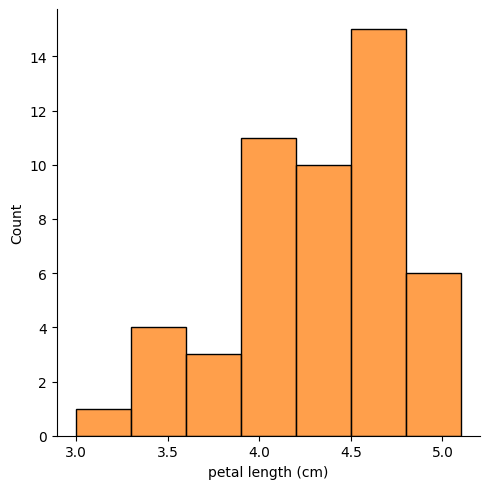

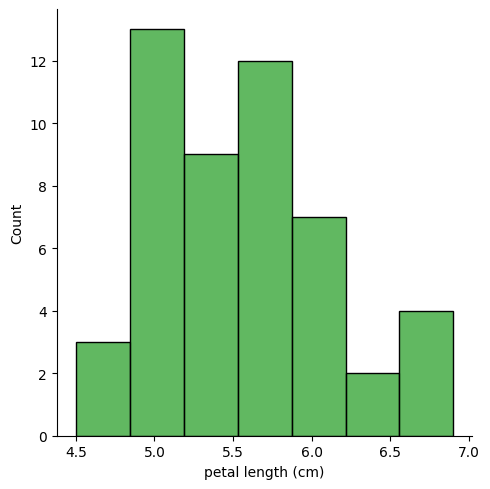

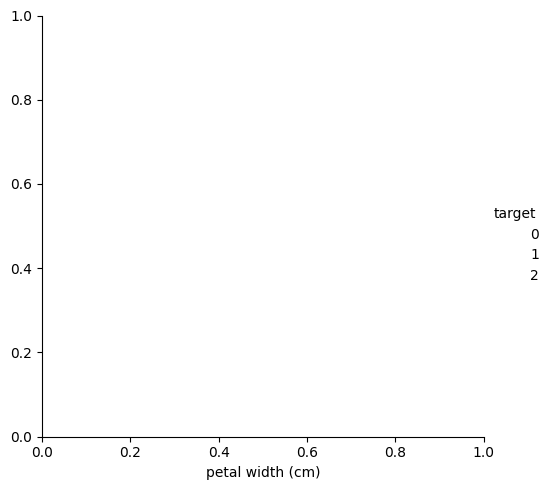

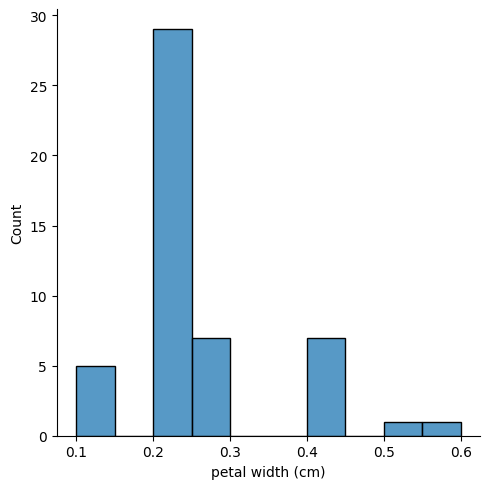

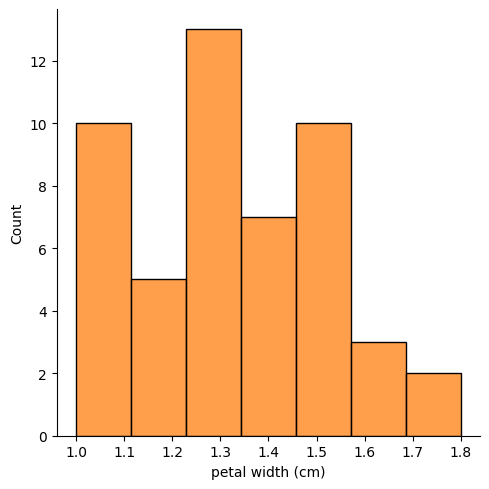

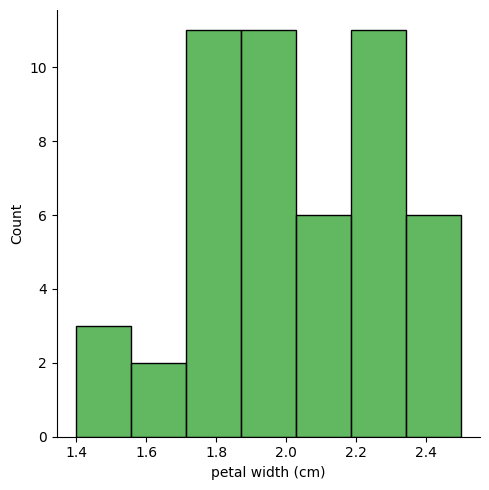

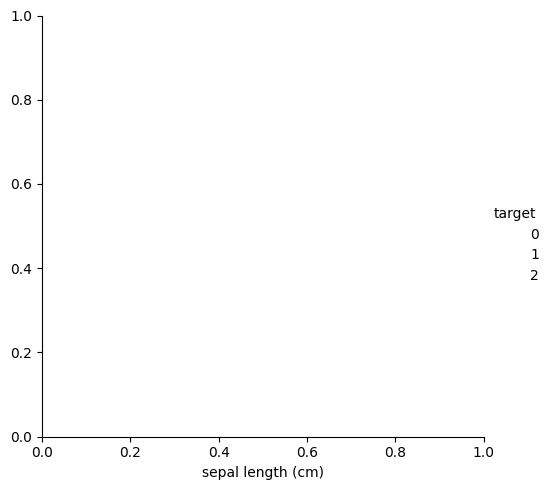

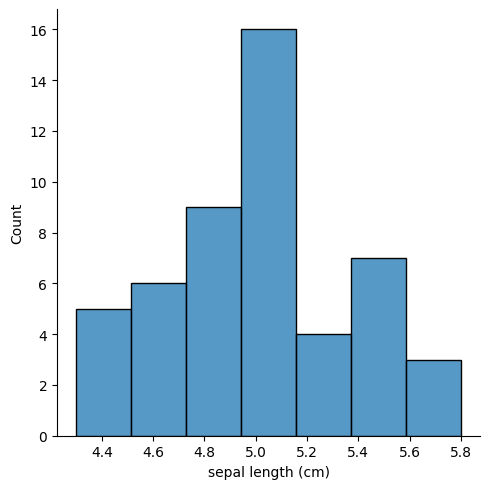

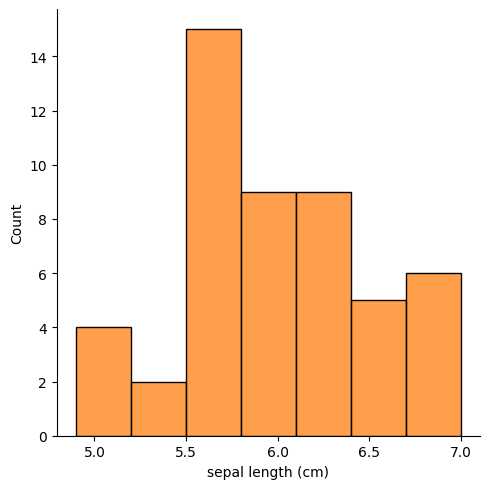

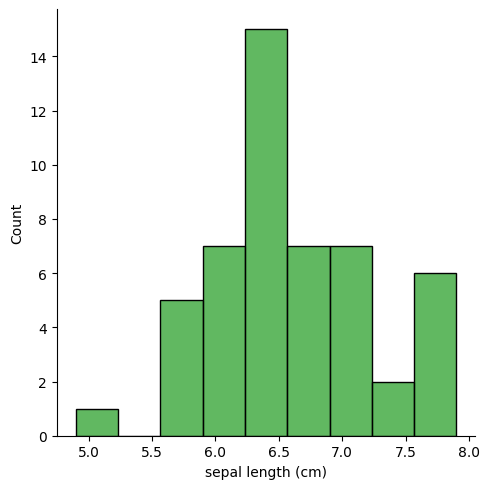

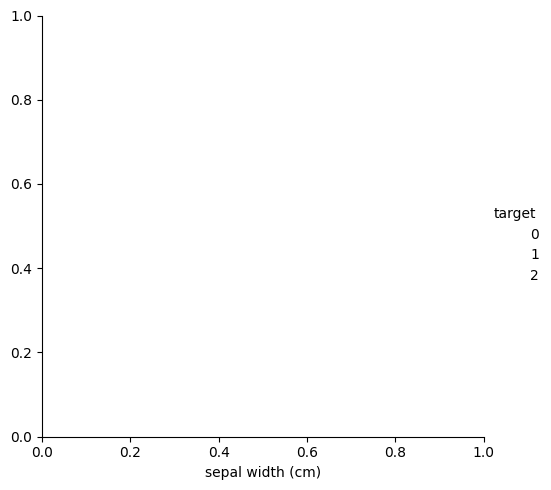

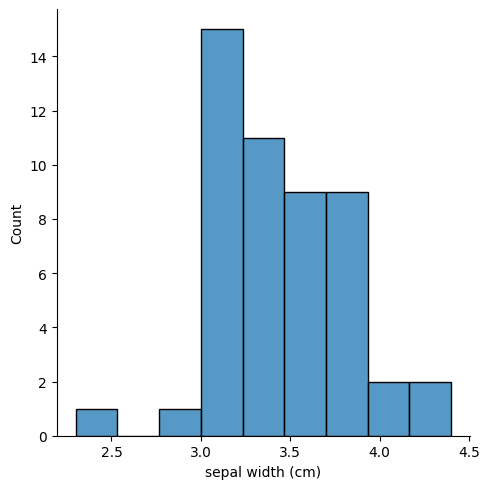

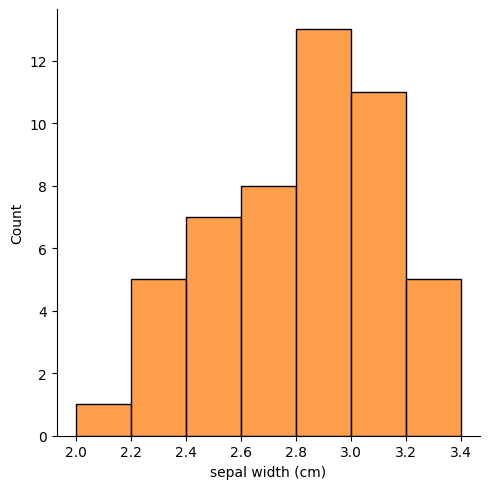

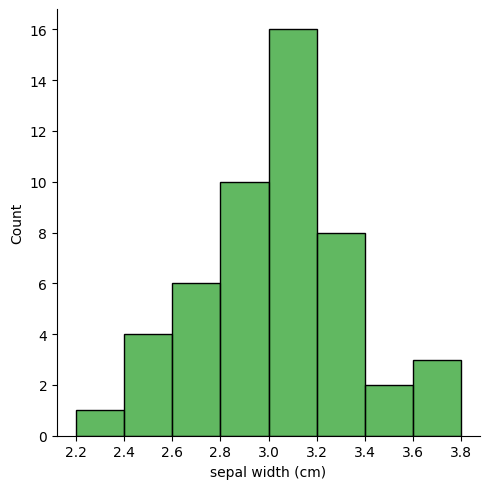

In [13]:
sns.FacetGrid(iris_df, hue="target", height=5).map(
    sns.displot, "petal length (cm)"
).add_legend()
sns.FacetGrid(iris_df, hue="target", height=5).map(
    sns.displot, "petal width (cm)"
).add_legend()
sns.FacetGrid(iris_df, hue="target", height=5).map(
    sns.displot, "sepal length (cm)"
).add_legend()
sns.FacetGrid(iris_df, hue="target", height=5).map(
    sns.displot, "sepal width (cm)"
).add_legend()
plt.show()


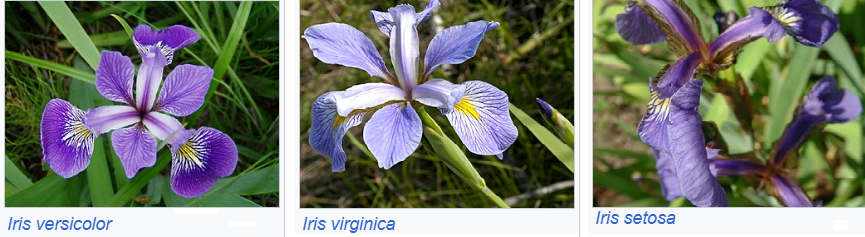


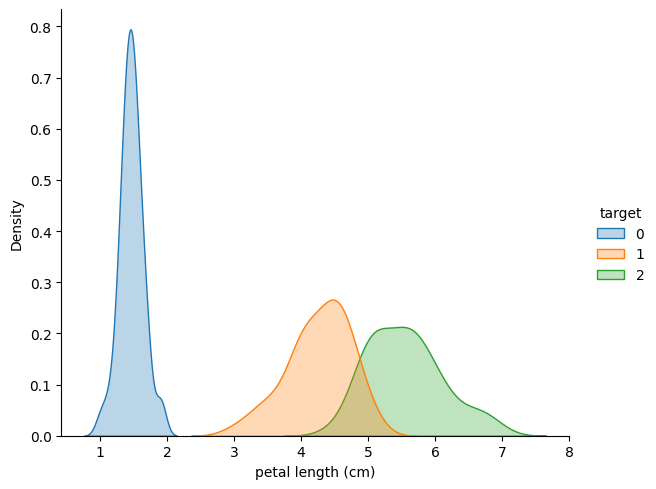

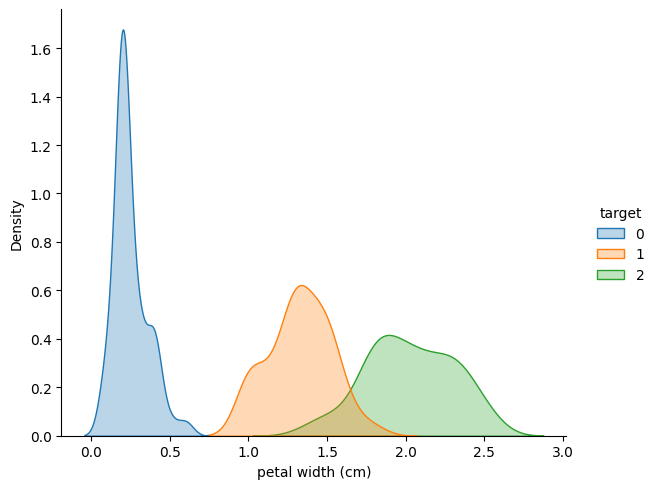

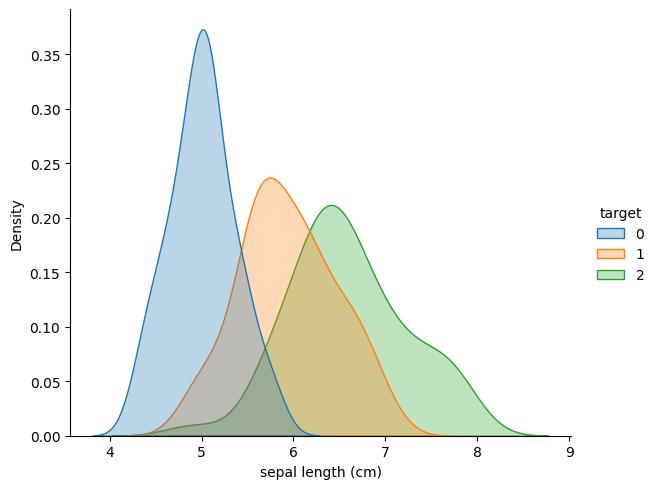

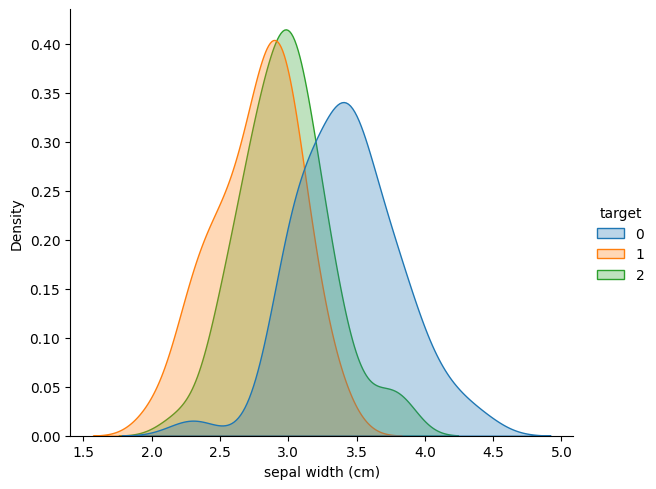

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming iris_df is already loaded and available
custom_palette = {
    0: "#1f77b4",  # Blue
    1: "#ff7f0e",  # Orange
    2: "#2ca02c",  # Green
}

sns.displot(
    iris_df,
    x="petal length (cm)",
    hue="target",
    height=5,
    kind="kde",
    aspect=1.2,
    fill=True,
    alpha=0.3,
    palette=custom_palette,
)
sns.displot(
    iris_df,
    x="petal width (cm)",
    hue="target",
    height=5,
    kind="kde",
    aspect=1.2,
    fill=True,
    alpha=0.3,
    palette=custom_palette,
)
sns.displot(
    iris_df,
    x="sepal length (cm)",
    hue="target",
    height=5,
    kind="kde",
    aspect=1.2,
    fill=True,
    alpha=0.3,
    palette=custom_palette,
)
sns.displot(
    iris_df,
    x="sepal width (cm)",
    hue="target",
    height=5,
    kind="kde",
    aspect=1.2,
    fill=True,
    alpha=0.3,
    palette=custom_palette,
)

plt.show()


In [7]:
labels = np.unique(iris["target"])
print(labels)

[0 1 2]


In [8]:
colors = ["blue", "red", "green"]

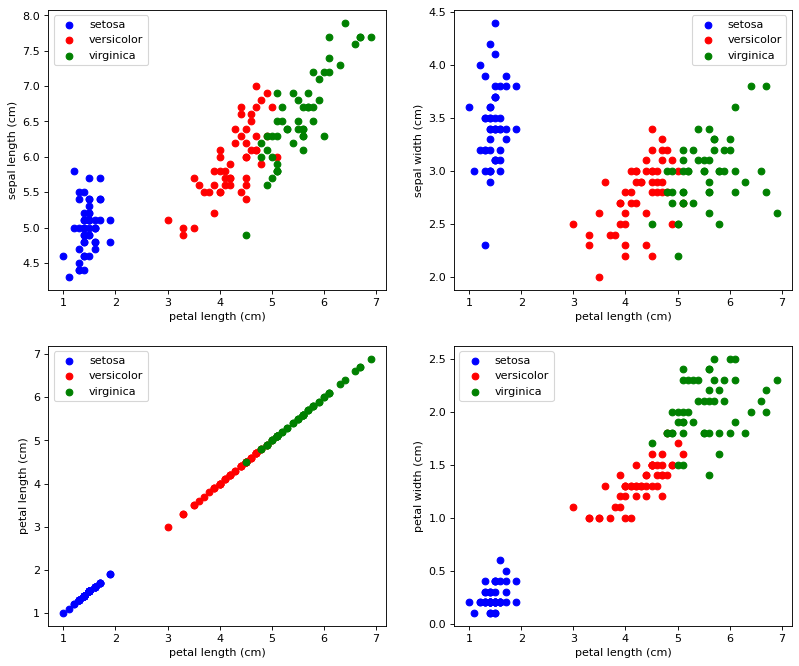

In [9]:
# plot petal width vs all other features
figure(figsize=(12, 10), dpi=80)
feature_x = 2  # petal length
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y + 1)  # subplot starts from 1 (not 0)
    for label, color in zip(range(len(iris.target_names)), colors):
        # find the label and plot the corresponding data
        plt.scatter(
            iris.data[iris.target == label, feature_x],
            iris.data[iris.target == label, feature_y],
            label=iris.target_names[label],
            # alpha = 0.45, # transparency
            color=color,
        )
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.legend()
plt.show()

In [10]:
X = iris_df.iloc[:, 0:2].values
Y = np.array(iris_df["target"])
print(X.shape), print(Y.shape)

(150, 2)
(150,)


(None, None)

In [11]:
type(Y)

numpy.ndarray

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=23, stratify=Y
)


Accuracy Linear: 0.7666666666666667


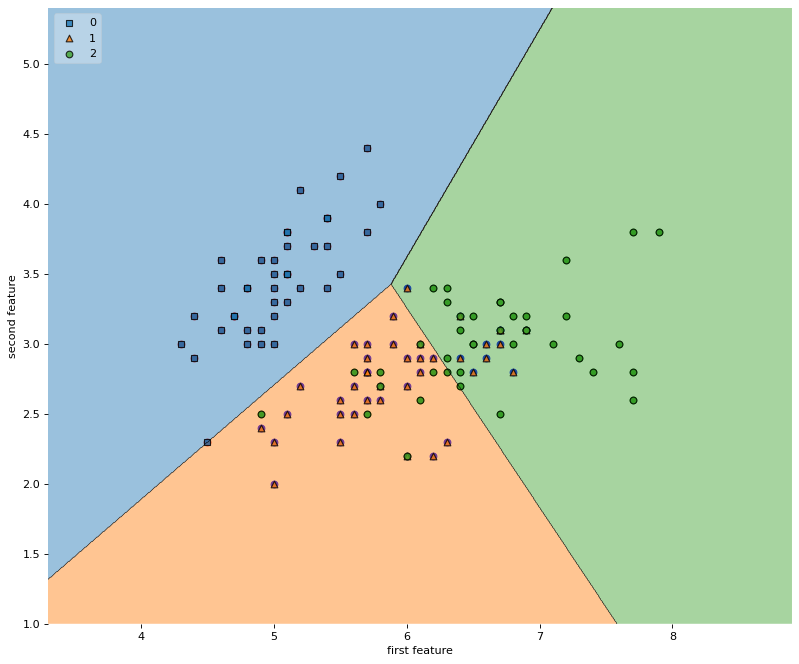

In [20]:
# Linear classifier
cls_lin = LogisticRegression()
cls_lin.fit(X_train, y_train)
pred_lin = cls_lin.predict(X_test)
score_lin = cls_lin.score(X_test, y_test)
# Plotting
figure(figsize=(12, 10), dpi=80)
print("Accuracy Linear:", score_lin)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="red")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="blue")
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], c="green")
plot_decision_regions(X=X_train, y=y_train, clf=cls_lin, legend=2)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [21]:
# Linear SVM
cls_svm_lin = SVC

Accuracy Non-Linear: 0.8


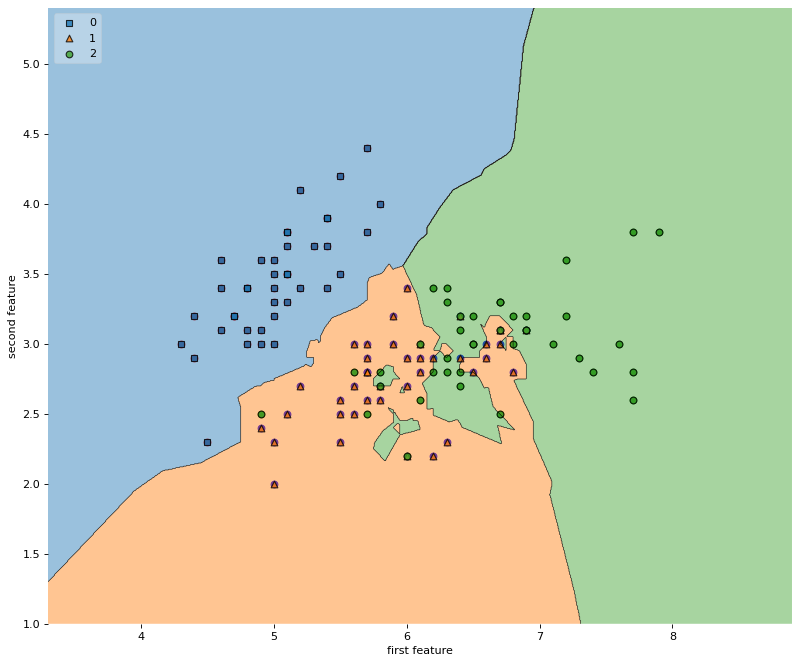

In [22]:
cls_nonlin = KNeighborsClassifier(n_neighbors=3)
cls_nonlin.fit(X_train, y_train)
pred_lin = cls_nonlin.predict(X_test)
score_nonlin = cls_nonlin.score(X_test, y_test)
print("Accuracy Non-Linear:", score_nonlin)
figure(figsize=(12, 10), dpi=80)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="red")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="blue")
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], c="green")
plot_decision_regions(X=X_train, y=y_train, clf=cls_nonlin, legend=2)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

features = ["sepal length", "sepal width", "petal length", "petal width"]
# Separating out the features
x = iris.data
# Separating out the target
y = iris.target
# Standardizing the features
x_std = StandardScaler().fit_transform(x)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
prin_Comp = pca.fit_transform(x_std)
prinDf = pd.DataFrame(data=prin_Comp, columns=["pc1", "pc2"])

In [25]:
prinDf.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [26]:
(Px_train, Px_test, Py_train, Py_test) = train_test_split(
    prin_Comp, iris.target, test_size=0.2, random_state=23, stratify=y
)
cls2 = KNeighborsClassifier()
cls2.fit(Px_train, Py_train)
prediction = cls2.predict(Px_test)
score = cls2.score(Px_test, Py_test)
print("Accuracy:", score)


Accuracy: 0.9


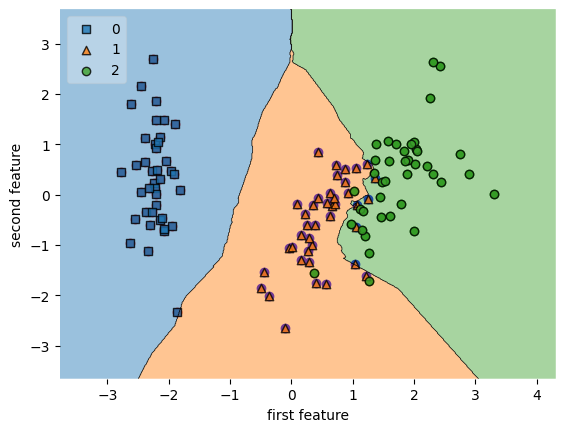

In [27]:
plt.scatter(Px_train[Py_train == 0, 0], Px_train[Py_train == 0, 1], c="red")
plt.scatter(Px_train[Py_train == 1, 0], Px_train[Py_train == 1, 1], c="blue")
plt.scatter(Px_train[Py_train == 2, 0], Px_train[Py_train == 2, 1], c="green")
plot_decision_regions(X=Px_train, y=Py_train, clf=cls2, legend=2)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

### Applications of PCA

- _Dimension reduction_
  PCA is used for dimensionality reduction, simplifying high-dimensional datasets while preserving essential information, speeding up computation, and improving performance.
- _noise reduction_
  Noise component being random in nature often exixts in lowerorderPCA components. Elimination of lower order components helps in noise reduction


## Image denoising

**olivetti_faces dataset**

- It has 40 distinct subjects, with 10 facial image samples per subject, and thus total of 400 images.
- Each image is a 64 x 64 grey image saved in a column vector of size 4096 (64 x 64)

**Image Denoising**

- In this demo we will add random noise to these facial images, discard lower 14 components and reconstruct images from 50 principal components.


In [28]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)
original = img_as_float(dataset.data)
faces = original.copy()
Nfaces = random_noise(faces, var=0.008)  # noisy faces
print(faces.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\desktop\scikit_learn_data
(400, 4096)


In [29]:
n_components = 30  # 256
estimator = decomposition.PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
print("Extracting the top %d PCs..." % (n_components))
# t0 = time()
faces_recons = estimator.inverse_transform(
    estimator.fit_transform(Nfaces)
)  # .T #+ mean_face #.T

Extracting the top 30 PCs...


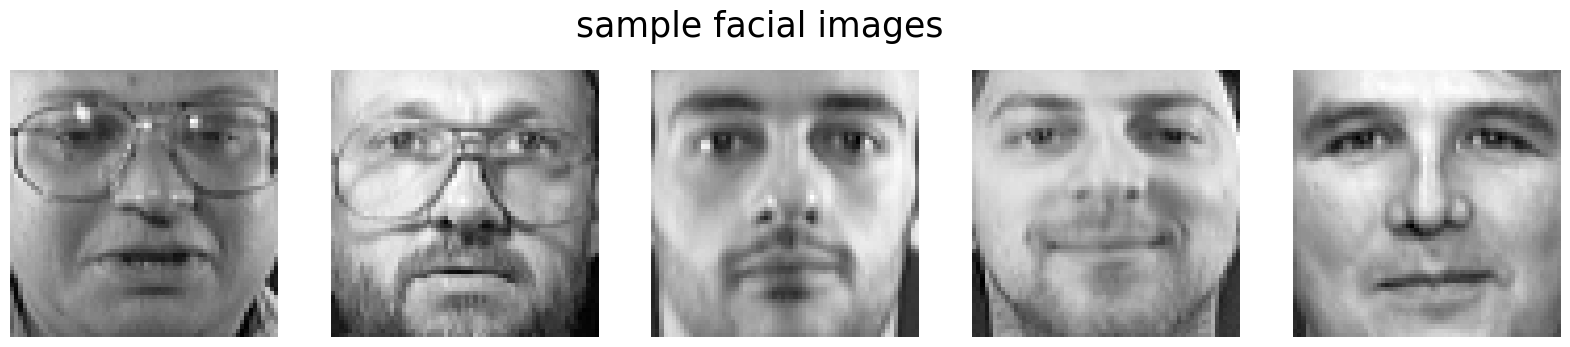

In [30]:
image_shape = [64, 64]
indices = np.random.choice(10, 5, replace=False)
plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    (
        plt.subplot(1, 5, i + 1),
        plt.imshow(np.reshape(faces[indices[i], :], image_shape), cmap="gray"),
        plt.axis("off"),
    )
plt.suptitle("sample facial images".format(n_components), size=25)
plt.show()

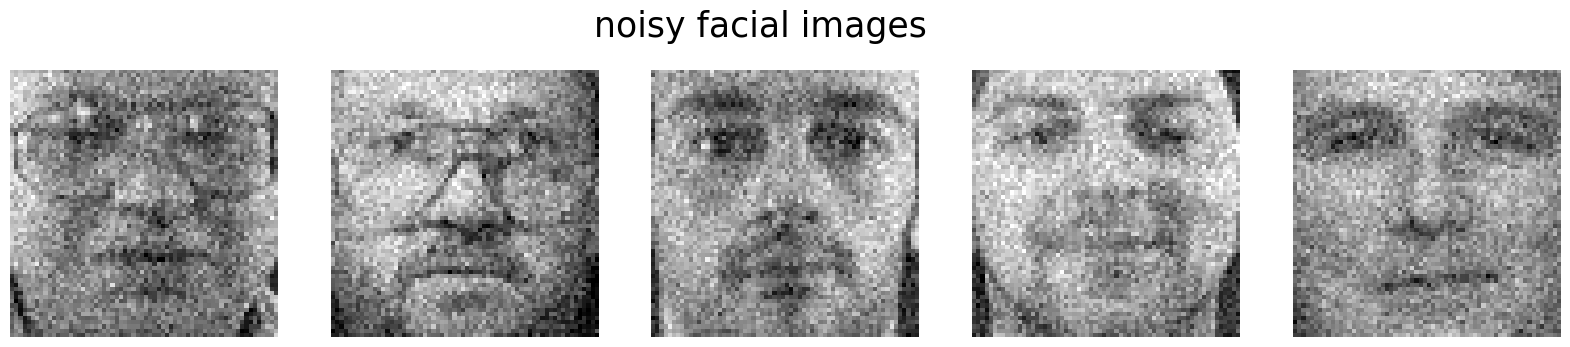

In [31]:
plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    (
        plt.subplot(1, 5, i + 1),
        plt.imshow(np.reshape(Nfaces[indices[i], :], image_shape), cmap="gray"),
        plt.axis("off"),
    )
plt.suptitle("noisy facial images".format(n_components), size=25)
plt.show()

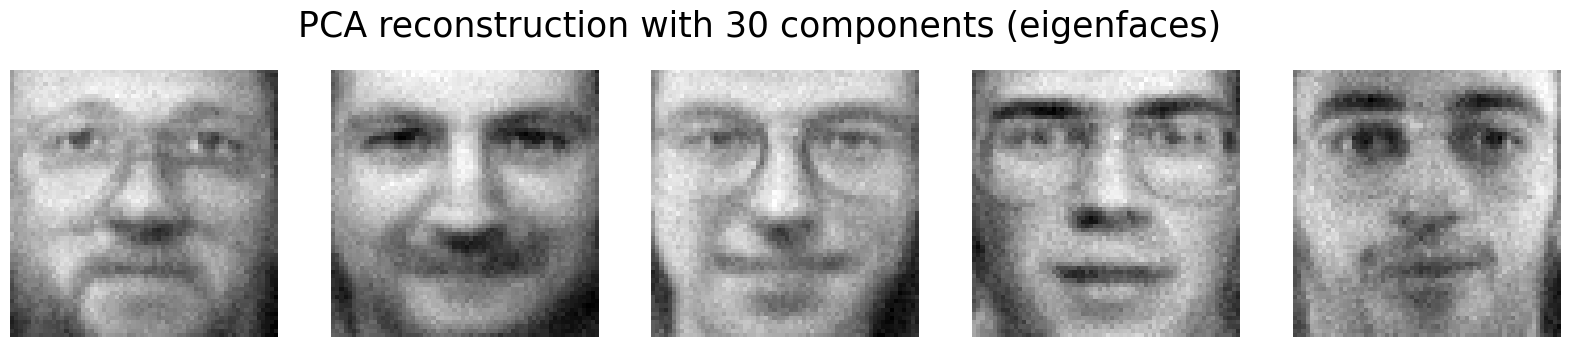

In [32]:
n_samples = 10
image_shape = [64, 64]
indices = np.random.choice(n_samples, 5, replace=False)
plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    (
        plt.subplot(1, 5, i + 1),
        plt.imshow(np.reshape(faces_recons[indices[i], :], image_shape), cmap="gray"),
        plt.axis("off"),
    )
plt.suptitle(
    "PCA reconstruction with {} components (eigenfaces)".format(n_components), size=25
)
plt.show()